In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from fastai.tabular import add_datepart
import numpy as np
#data = pd.read_csv('../data/train.csv')

data = pd.read_csv('../data/train_con_features.csv')


In [2]:
data.head()

,Unnamed: 0,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,0,254099,depto tipo a 402,depto interior de 80 15m2 consta de sala com...,Apartamento,avenida division del norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,1,53461,condominio horizontal en venta,p entre sonora y guerrero atr aacute s del h...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.000000,3.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,2,247984,casa en venta urbi 3 recamaras tonala,descripcion la mejor ubicacion residencial en...,Casa,urbi tonala,Tonalá,Jalisco,5.000000,3.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,ignacio manuel altamirano 128,Zinacantepec,Edo. de México,1.000000,2.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,paseos del sol,Zapopan,Jalisco,10.000000,2.0,...,0,0,0,1,0.074108,0,0,0,2016,6


In [3]:
add_datepart(data, 'fecha')

,Unnamed: 0,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,...,fechaDay,fechaDayofweek,fechaDayofyear,fechaIs_month_end,fechaIs_month_start,fechaIs_quarter_end,fechaIs_quarter_start,fechaIs_year_end,fechaIs_year_start,fechaElapsed
0,0,254099,depto tipo a 402,depto interior de 80 15m2 consta de sala com...,Apartamento,avenida division del norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,...,23,6,235,False,False,False,False,False,False,1440288000
1,1,53461,condominio horizontal en venta,p entre sonora y guerrero atr aacute s del h...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.000000,3.0,...,28,4,179,False,False,False,False,False,False,1372377600
2,2,247984,casa en venta urbi 3 recamaras tonala,descripcion la mejor ubicacion residencial en...,Casa,urbi tonala,Tonalá,Jalisco,5.000000,3.0,...,17,5,290,False,False,False,False,False,False,1445040000
3,3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,ignacio manuel altamirano 128,Zinacantepec,Edo. de México,1.000000,2.0,...,9,4,69,False,False,False,False,False,False,1331251200
4,4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,paseos del sol,Zapopan,Jalisco,10.000000,2.0,...,7,1,159,False,False,False,False,False,False,1465257600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,bosques,Zinacantepec,Edo. de México,0.000000,2.0,...,8,6,39,False,False,False,False,False,False,1423353600
239996,239996,259178,casa en condominio a 10 min del centro de toluca,casa con un jardin amplio un cuarto de servic...,Casa,filiberto navas 325,Toluca,Edo. de México,0.000000,3.0,...,10,3,191,False,False,False,False,False,False,1404950400
239997,239997,131932,nicolas san juan,departamento con excelente ubicación muy cerc...,Apartamento,nicolas san juan,Benito Juárez,Distrito Federal,20.000000,2.0,...,3,1,62,False,False,False,False,False,False,1425340800
239998,239998,146867,casa sola javier rojo gomez,casa sola dividida en cuatro departamentos de...,Casa,javier rojo gomez 120,Iztapalapa,Distrito Federal,20.000000,4.0,...,26,4,360,False,False,False,False,False,False,1419552000


In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'titulo', 'descripcion', 'tipodepropiedad',
       'direccion', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
       'garages', 'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'provincia_top5', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa',
       'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial',
       'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio',
       'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial',
       'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex',
       'es_Inmuebles_productivos_urbanos', 'es_Departamento_C

In [5]:
predictor_cols = ["antiguedad","habitaciones", "garages","banos","metroscubiertos","metrostotales", "gimnasio", 
                  "usosmultiples", "piscina", "escuelascercanas", "centroscomercialescercanos",
                  "fechaYear", "fechaMonth",
                  "fechaWeek", "fechaDay", 
                  "fechaDayofweek", 
                  "fechaDayofyear",
                  "fechaElapsed",            
                  "es_Apartamento", "es_Casa_en_condominio", "es_Casa", "es_Terreno",
                  "es_Terreno_comercial", "es_Local_Comercial", "es_Quinta_Vacacional",
                  "es_Oficina_comercial", "es_Edificio", "es_Casa_uso_de_suelo",
                  "es_Local_en_centro_comercial", "es_Bodega_comercial", "es_Otros",
                  "es_Villa", "es_Duplex", "es_Inmuebles_productivos_urbanos",
                  "es_Departamento_Compartido", "es_Nave_industrial", "es_Rancho",
                  "es_Terreno_industrial", "es_Huerta", "es_Lote", "es_Hospedaje", "es_Garage",
                  "seguridad_descripcion", "moderno_descripcion", "hermoso_descripcion", "estado_descripcion", 
                  "seguridad_titulo", "moderno_titulo", "hermoso_titulo", "estado_titulo",
                  "relacion_palabras_descripcion", "cantidad_palabras_descripcion",
                  "provincia_top5", "es_ciudad_capital", "ciudad_turistica_top15", "precio_prom_ciudad"                 
                 ]
#train_X = data[predictor_cols]


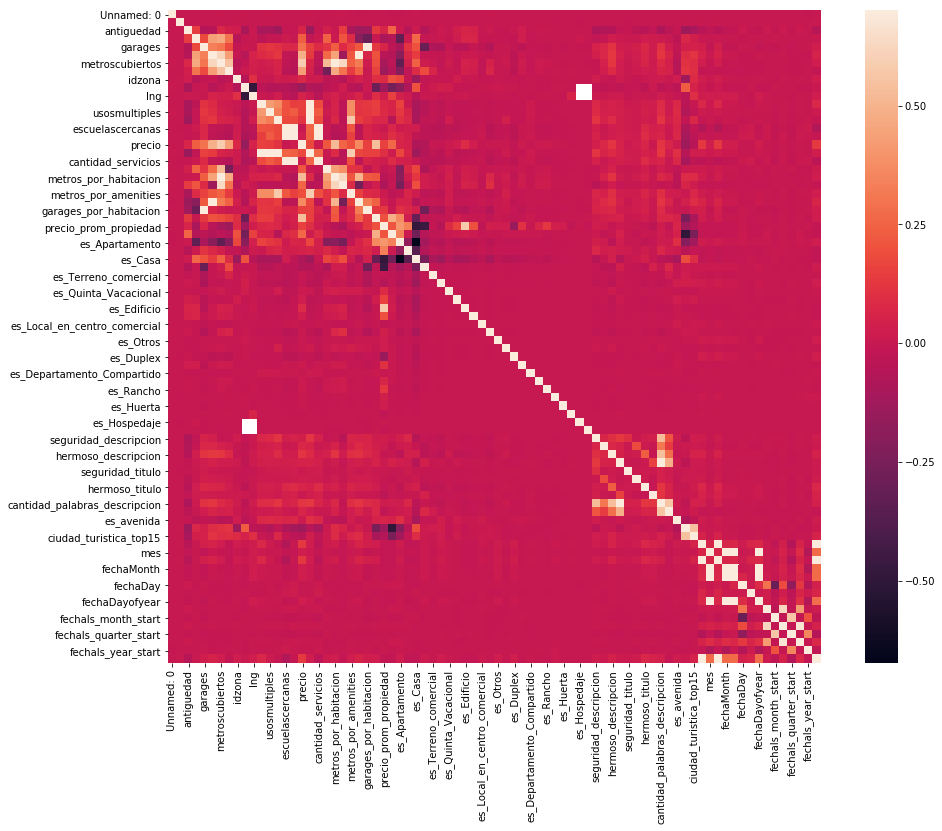

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.7, square=True)

 luego de analizar la matriz de correlacion me quedo con estos features (leve mejora)


In [7]:
predictor_cols = ["antiguedad","habitaciones", "garages","banos","metroscubiertos","metrostotales", "gimnasio", 
                  "usosmultiples", "piscina", "escuelascercanas", "centroscomercialescercanos",
                  "fechaYear", "fechaMonth",
                  "fechaWeek", "fechaDay", 
                  #"fechaDayofweek", 
                  #"fechaDayofyear",
                  #"fechaElapsed",            
                  "es_Apartamento", "es_Casa_en_condominio", "es_Casa", "es_Terreno",
                  "es_Garage",
                  "seguridad_descripcion", "moderno_descripcion", "hermoso_descripcion", "estado_descripcion", 
                  "seguridad_titulo", "moderno_titulo", "hermoso_titulo", "estado_titulo",
                  "relacion_palabras_descripcion", "cantidad_palabras_descripcion",
                  "provincia_top5", "es_ciudad_capital", "ciudad_turistica_top15", "precio_prom_ciudad"                 
                 ]

In [8]:
#train_X.head()

In [9]:
# extraer datos en destino (y) y predictores (X)
X = data[predictor_cols]
Y = data.precio



In [10]:
interesting_variables = matrix['precio'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.20]
interesting_variables = interesting_variables[interesting_variables.index != 'precio']
interesting_variables

metroscubiertos          0.582089
precio_prom_ciudad       0.536478
metros_por_habitacion    0.518394
banos                    0.488097
metrostotales            0.431865
bano_por_habitacion      0.365318
garages                  0.295493
provincia_top5           0.260460
metros_por_bano          0.249982
habitaciones             0.237289
relacion_metros          0.213312
Name: precio, dtype: float64

In [11]:
Y.head()

0    2273000.0
1    3600000.0
2    1200000.0
3     650000.0
4    1150000.0
Name: precio, dtype: float64

In [12]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,seguridad_titulo,moderno_titulo,hermoso_titulo,estado_titulo,relacion_palabras_descripcion,cantidad_palabras_descripcion,provincia_top5,es_ciudad_capital,ciudad_turistica_top15,precio_prom_ciudad
0,8.116114,2.0,1.0,2.0,80.0,80.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.000000,0,1,0,0,3.384659e+06
1,10.000000,3.0,2.0,2.0,268.0,180.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0.007968,1,1,0,0,4.605869e+06
2,5.000000,3.0,2.0,2.0,144.0,166.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.046957,10,0,0,0,8.870115e+05
3,1.000000,2.0,1.0,1.0,63.0,67.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0.000000,0,1,0,0,1.472305e+06
4,10.000000,2.0,1.0,1.0,95.0,95.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.074108,1,0,0,0,2.749675e+06


In [13]:
#X = df_train[columnas_numericas_y_precio].drop(columns=['precio']).values
#y = df_train['precio'].values
#train_Y = train_X.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(192000, 34) (192000,)
(48000, 34) (48000,)


In [15]:
modelo_usado = RandomForestRegressor(n_estimators=50)



In [16]:
modelo_usado_fit = modelo_usado.fit(X_train, y_train)


In [17]:
# Uso el modelo para predecir
prediccion_precios = modelo_usado_fit.predict(X_test)


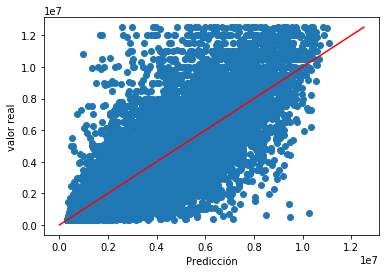

In [18]:
# Build a plot
plt.scatter(prediccion_precios, y_test)
plt.xlabel('Predicción')
plt.ylabel('valor real')

# Se agrega linea de predicción
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error

RandomForest_mae = mean_absolute_error(y_test, prediccion_precios)
RandomForest_mae_train = mean_absolute_error(y_train, modelo_usado_fit.predict(X_train))
print(f"MAE RandomForest (train): {RandomForest_mae_train:.5f}")
print(f"MAE RandomForest: {RandomForest_mae:.5f}")
print("------------------------------")

MAE RandomForest (train): 229712.67764
MAE RandomForest: 612577.64476
------------------------------


In [20]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error


In [21]:
print('MAE:\t$%.2f' % mean_absolute_error(y_test, prediccion_precios))


MAE:	$612577.64


In [156]:
#MAE RandomForest (train): 225127.82486
#MAE RandomForest: 604900.41371

In [29]:
for feature in zip(predictor_cols, modelo_usado_fit.feature_importances_):
    print(feature)

('antiguedad', 0.03270843581725427)
('habitaciones', 0.018661045552909265)
('garages', 0.017945180662916463)
('banos', 0.022068029398800374)
('metroscubiertos', 0.3757689245179448)
('metrostotales', 0.061396277354360304)
('gimnasio', 0.0028225961486631345)
('usosmultiples', 0.0015757621253645136)
('piscina', 0.002804675847802283)
('escuelascercanas', 0.0033709673376337806)
('centroscomercialescercanos', 0.0036047263669962055)
('fechaYear', 0.029653956375723847)
('fechaMonth', 0.009429209510928759)
('fechaWeek', 0.023340052196395133)
('fechaDay', 0.02563942462249952)
('es_Apartamento', 0.018013220389291318)
('es_Casa_en_condominio', 0.0021159005626418077)
('es_Casa', 0.006510622872562369)
('es_Terreno', 0.016466887065632697)
('es_Garage', 0.0)
('seguridad_descripcion', 0.0024277198984959157)
('moderno_descripcion', 0.0015477618101117218)
('hermoso_descripcion', 0.0033334872132036886)
('estado_descripcion', 0.0039294106874885075)
('seguridad_titulo', 0.00020899012145462098)
('moderno_tit

In [19]:
##todo: ajustar modelo

In [26]:
## MEJORA DE HIPERPARAMETROS
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint


param_dist_random = {
    "max_depth": [5, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "n_estimators": np.linspace(10,100,10).astype(int)
   
}
parametros_busqueda_rf = {
    "criterion": ["gini", "entropy"],
    "n_estimators": np.linspace(10,100,10).astype(int),
    "class_weight": [None, "balanced"]
}

In [158]:
mejor_modelo_buscado = RandomForestRegressor()
#clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                   cv=StratifiedKFold(Y, n_folds=5, shuffle=True), 
#                   scoring='roc_auc',
#                   verbose=2, refit=True)

mejor_modelo_a_usar = RandomizedSearchCV(estimator=mejor_modelo_buscado, 
                    param_distributions=param_dist_random,
                   scoring="neg_mean_absolute_error", n_jobs=3, n_iter=22, random_state=7)

NameError: name 'RandomizedSearchCV' is not defined

In [28]:
mejor_modelo_a_usar.fit(X_train,y_train)


/home/cesar/anaconda3/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   rando...


In [125]:
print(mejor_modelo_a_usar.best_score_)

print(mejor_modelo_a_usar.best_estimator_)

NameError: name 'mejor_modelo_a_usar' is not defined

In [159]:
# leo los datos de test para predecir 
test = pd.read_csv('../data/test_con_features.csv')


In [160]:
add_datepart(test, 'fecha')

,Unnamed: 0,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,...,fechaDay,fechaDayofweek,fechaDayofyear,fechaIs_month_end,fechaIs_month_start,fechaIs_quarter_end,fechaIs_quarter_start,fechaIs_year_end,fechaIs_year_start,fechaElapsed
0,0,4941,casa en venta en miguel hidalgo distrito federal,p excelente casa estilo moderno p,Casa,bosque de cedros,Miguel Hidalgo,Distrito Federal,29.000000,3.0,...,20,5,201,False,False,False,False,False,False,1374278400
1,1,51775,departamentos en venta en montebello,p departamento una recamara p p departame...,Apartamento,sin datos,Mérida,Yucatán,8.116114,1.0,...,24,5,297,False,False,False,False,False,False,1445644800
2,2,115253,departamento nuevo delegación coyoacán de 87 m...,departamento nuevo de 87 06 m2 1 cajón de est...,Apartamento,pueblo de los reyes coyoacán mexico d f,Coyoacán,Distrito Federal,0.000000,2.0,...,30,5,150,False,False,False,False,False,False,1432944000
3,3,299321,departamento en venta en acapulco,p raíces dv001 precioso departamento tipo k...,Apartamento,sin datos,Acapulco de Juárez,Guerrero,2.000000,2.0,...,2,3,92,False,False,False,False,False,False,1427932800
4,4,173570,bonita casa sola equipada de dos niveles en lo...,p casa sola bonita de dos rec aacute maras u...,Casa,cedros,Tultitlán,Edo. de México,10.000000,2.0,...,15,3,227,False,False,False,False,False,False,1376524800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,75094,oportunidad se vende amplia casa en col moc...,oportunidad ideal para oficina o casa habita...,Casa,oriente 172 265,Venustiano Carranza,Distrito Federal,20.000000,4.0,...,19,5,262,False,False,False,False,False,False,1442620800
59996,59996,171847,colinas de ecatepec,casa sala comedor patio de servicio buenas ...,Casa,colinas,Ecatepec de Morelos,Edo. de México,10.000000,3.0,...,19,2,293,False,False,False,False,False,False,1476835200
59997,59997,138313,estrene hermosa casa en sierra morena,hermosa casa lista para habitarse ubicada en f...,Casa,s calle,Guadalupe,Nuevo León,5.000000,3.0,...,2,1,336,False,False,False,False,False,False,1417478400
59998,59998,271268,zen house i venta de linda casa con acabados ...,hermosa casa con acabados de lujo en fracciona...,Casa,zen house l,Querétaro,Querétaro,0.000000,2.0,...,21,4,295,False,False,False,False,False,False,1477008000


In [161]:
mejor_modelo_usado = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)



In [162]:
modelo_usado_ajustado = mejor_modelo_usado.fit(X_train,y_train)


In [163]:
test[predictor_cols].head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,seguridad_titulo,moderno_titulo,hermoso_titulo,estado_titulo,relacion_palabras_descripcion,cantidad_palabras_descripcion,provincia_top5,es_ciudad_capital,ciudad_turistica_top15,precio_prom_ciudad
0,29.000000,3.0,1.546874,4.0,300.0,176.765145,0.0,0.0,0.0,0.0,...,0,0,0,0,0.287682,2,1,0,0,4.496526e+06
1,8.116114,1.0,1.000000,1.0,67.0,67.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0.000000,0,0,1,1,2.028803e+06
2,0.000000,2.0,1.000000,2.0,87.0,100.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0.000000,0,1,0,0,3.407009e+06
3,2.000000,2.0,2.000000,2.0,86.0,86.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0.000000,0,1,0,0,2.585813e+06
4,10.000000,2.0,1.000000,1.0,80.0,76.000000,0.0,0.0,0.0,1.0,...,0,0,0,0,0.000000,0,1,0,0,9.147382e+05


In [164]:
#len(prediccion_precios)
#X_train.count()

In [165]:
prediccion_precios = modelo_usado_ajustado.predict(test[predictor_cols])


In [166]:
mi_submit = pd.DataFrame({'id': test.id, 'target': prediccion_precios})


In [167]:
mi_submit.to_csv('../data/submission_RF_v05.csv', index=False)

In [61]:
print(prediccion_precios)

[6506709.728235  895140.921105 2250741.567398 1596219.285339 ...  763602.632035 1345693.467641 1572398.334257
 2306615.550265]
